In [87]:
# import dependencies
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from api_keys import census_api

In [2]:
# read in csv file
combined_homicide = pd.read_csv("Data/homicide.csv")

combined_homicide.head()

,CASE #,Date of Occurance,Primary Description,Description,Beat,Ward,Year,Latitude,Longitude
0,HT405253,07/19/2011 04:00:00 PM,HOMICIDE,FIRST DEGREE MURDER,732,6.0,2011,41.766565,-87.638386
1,HT578691,11/07/2011 12:05:00 PM,HOMICIDE,FIRST DEGREE MURDER,2123,4.0,2011,41.822200,-87.602135
2,HT576092,11/05/2011 01:50:00 PM,HOMICIDE,FIRST DEGREE MURDER,1122,28.0,2011,41.877169,-87.719061
3,HT581763,11/09/2011 02:00:00 PM,HOMICIDE,FIRST DEGREE MURDER,522,34.0,2011,41.688889,-87.628242
4,HT582731,11/10/2011 02:40:00 AM,HOMICIDE,FIRST DEGREE MURDER,614,18.0,2011,41.741304,-87.659690


In [3]:
# Here we are grabbing poverty data from this census API.
# This query returns an estimate number of households with income below the poverty level in Chicago in 2006.
poverty_2006_query = f"https://api.census.gov/data/2006/acs/acs1?get=B17009_002E&for=place:14000&in=state:17&key={census_api}"

poverty_2006_response = requests.get(poverty_2006_query).json()

poverty_2006 = poverty_2006_response[1][0]

poverty_2006

'161070'

In [5]:
# This query returns an estimate number of households with income below the poverty level in Chicago in 2011.
poverty_2011_query = f"https://api.census.gov/data/2011/acs/acs1?get=B17009_002E&for=place:14000&in=state:17&key={census_api}"

poverty_2011_response = requests.get(poverty_2011_query).json()

poverty_2011 = poverty_2011_response[1][0]

poverty_2011

'179036'

In [4]:
# This query returns an estimate number of households with income below the poverty level in Chicago in 2016.
poverty_2016_query = f"https://api.census.gov/data/2016/acs/acs1?get=B17009_002E&for=place:14000&in=state:17&key={census_api}"

poverty_2016_response = requests.get(poverty_2016_query).json()

poverty_2016 = poverty_2016_response[1][0]

poverty_2016

'172571'

In [7]:
homicides_per_year = combined_homicide['Year'].value_counts()

homicides_per_year

2020    813
2016    788
2001    667
2006    477
2011    438
Name: Year, dtype: int64

In [80]:
homicides_poverty_df = pd.DataFrame(homicides_per_year).reset_index()

homicides_poverty_df = homicides_poverty_df.rename(columns={'index':'Year','Year':'Homicides'})

homicides_poverty_df = homicides_poverty_df.sort_values('Year').reset_index(drop=True)

homicides_poverty_df = homicides_poverty_df.drop(labels=[0,4], axis=0).reset_index(drop=True)

homicides_poverty_df['Households Below Poverty Level'] = [poverty_2006, poverty_2011, poverty_2016]

homicides_poverty_df

,Year,Homicides,Households Below Poverty Level
0,2006,477,161070
1,2011,438,179036
2,2016,788,172571


In [81]:
homicides_poverty_df['Households Below Poverty Level'] = homicides_poverty_df['Households Below Poverty Level'].astype(int)

In [82]:
homicides_poverty_df.dtypes

Year                              int64
Homicides                         int64
Households Below Poverty Level    int32
dtype: object

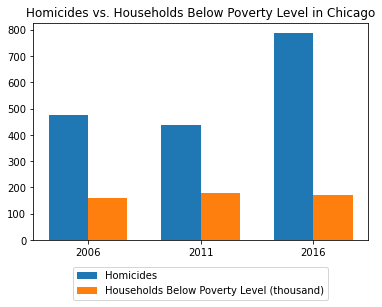

In [120]:
years = homicides_poverty_df['Year']
homicides = homicides_poverty_df['Homicides']
poverty_levels = homicides_poverty_df['Households Below Poverty Level']

x_axis = np.arange(len(years))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x_axis - width/2, homicides, width, label='Homicides')
ax.bar(x_axis + width/2, poverty_levels/1000, width, label='Households Below Poverty Level (thousand)')

ax.set_xticks(x_axis)
ax.set_xticklabels(years)
ax.set_title('Homicides vs. Households Below Poverty Level in Chicago')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.show()

In [107]:
community_area_pov = pd.read_csv("Data/socioeconomic_census.csv")

community_area_pov = community_area_pov.drop(labels=[77], axis=0)

community_area_pov

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
72,73.0,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0


In [109]:
community_area_homicides = pd.read_csv("Data/community_area_data.csv")

community_area_homicides = community_area_homicides.rename(columns={'Community Area':'Community Area Number'})

community_area_homicides

,Community Area Number,Homicides
0,25,94
1,67,78
2,23,71
3,68,59
4,29,58
...,...,...
68,72,1
69,64,1
70,55,1
71,5,1


In [113]:
merged_community_area = community_area_pov.merge(community_area_homicides, on='Community Area Number')

merged_community_area

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Homicides
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,9
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,3
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,10
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,1
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,1
...,...,...,...,...,...,...,...,...,...,...
68,71.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528,74.0,54
69,72.0,Beverly,0.9,5.1,8.0,3.7,40.5,39523,12.0,1
70,73.0,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0,18
71,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0,19


In [115]:
merged_community_area = merged_community_area.sort_values(by=['Homicides'], ascending=False)

merged_community_area

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Homicides
22,25.0,Austin,6.3,28.6,22.6,24.4,37.9,15957,73.0,94
64,67.0,West Englewood,4.8,34.4,35.9,26.3,40.7,11317,89.0,78
20,23.0,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0,71
65,68.0,Englewood,3.8,46.6,28.0,28.5,42.5,11888,94.0,59
26,29.0,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034,87.0,58
...,...,...,...,...,...,...,...,...,...,...
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,1
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,1
69,72.0,Beverly,0.9,5.1,8.0,3.7,40.5,39523,12.0,1
61,64.0,Clearing,2.7,8.9,9.5,18.8,37.6,25113,29.0,1


In [118]:
max_community_areas = merged_community_area.head(5)

max_community_areas

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Homicides
22,25.0,Austin,6.3,28.6,22.6,24.4,37.9,15957,73.0,94
64,67.0,West Englewood,4.8,34.4,35.9,26.3,40.7,11317,89.0,78
20,23.0,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0,71
65,68.0,Englewood,3.8,46.6,28.0,28.5,42.5,11888,94.0,59
26,29.0,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034,87.0,58


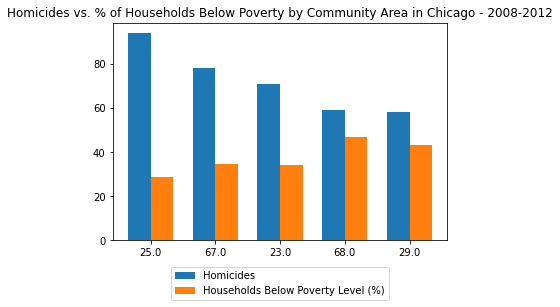

In [122]:
area = max_community_areas['Community Area Number']
area_homicides = max_community_areas['Homicides']
area_poverty_levels = max_community_areas['PERCENT HOUSEHOLDS BELOW POVERTY']

x_axis = np.arange(len(area))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x_axis - width/2, area_homicides, width, label='Homicides')
ax.bar(x_axis + width/2, area_poverty_levels, width, label='Households Below Poverty Level (%)')

ax.set_xticks(x_axis)
ax.set_xticklabels(area)
ax.set_title('Homicides vs. % of Households Below Poverty by Community Area in Chicago - 2008-2012')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.show()